Import packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, Flatten
from keras.regularizers import L2
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

Download dataset to colab

In [4]:
%cd '/content'
import os
if not os.path.isfile('intel-image-classification.zip'):
  from google.colab import files
  files.upload()
  !mkdir ~/.kaggle
  !mv ./kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json
  !kaggle datasets download -d puneet6060/intel-image-classification
  !unzip intel-image-classification.zip
  

/content


Show random image from the training dataset

In [5]:
categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

def show_random_image(X,Y):
  l = len(X)
  ran =  np.random.randint(0, l)
  index =np.argmax(Y[ran], axis=None, out=None)
  plt.xlabel(categories[index])
  plt.imshow((X[ran]*255).astype(np.int))
  plt.show

Load dataset given a path

In [6]:
def load_data(path, flip=False, flipCounter=0):
    %cd $path
    X, Y = [], []
    i = 0
    for category in categories:
        label = categories.index(category)
        for fileName in os.listdir(category):
            image = cv2.resize(cv2.imread(os.path.join(
                category, fileName)), (150, 150))/255
            img32 = np.float32(image)
            image = cv2.cvtColor(img32, cv2.COLOR_BGR2RGB)
            del img32
            X.append(np.array(image, dtype=np.float16))
            Y.append(label)
            if flip and i <= flipCounter:
                X.append(np.array(cv2.flip(image, 1), dtype=np.float16))
                Y.append(label)
                i = i + 1

    dataset = list(zip(X, Y))
    random.shuffle(dataset)
    X, Y = zip(*dataset)

    X = np.array(X)
    Y = np_utils.to_categorical(np.array(Y, dtype=np.float16), 6)
    
    %cd ../../..
    return X, Y


def load_prediction_data(path):
    %cd $path
    X = []
    for fileName in os.listdir():
        image = cv2.resize(cv2.imread(fileName), (150, 150))/255
        image = cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2RGB)
        X.append(np.array(image, dtype=np.float16))

    X = np.array(X)
    %cd ../../..
    return X

> Load trainng set 

/content/seg_train/seg_train
/content
(14034, 150, 150, 3)
(14034, 6)


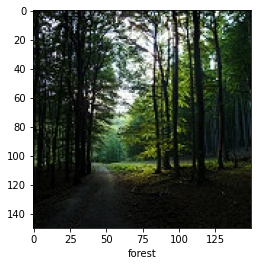

In [7]:
X_train, Y_train = load_data('/content/seg_train/seg_train')
print(X_train.shape)
print(Y_train.shape)
show_random_image(X_train,Y_train)

> Load testing set 

/content/seg_test/seg_test
/content
(3000, 150, 150, 3)
(3000, 6)


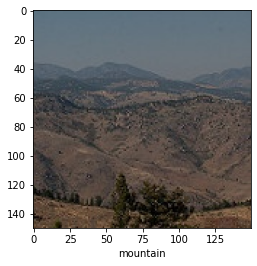

In [8]:
X_test, Y_test = load_data('/content/seg_test/seg_test')
print(X_test.shape)
print(Y_test.shape)
show_random_image(X_test,Y_test)

> Mount google drive to save model

In [9]:
from google.colab import drive
drive.mount('/content/drive')

from datetime import datetime
now = datetime.now()
print(now)

save_location = f"/content/drive/MyDrive/IIC-Project/" 
checkpoint_path = f'{now}/training.ckpt'
model_path = f'{now}/model.h5'
cp_callback = ModelCheckpoint(filepath=save_location+checkpoint_path,verbose=1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2021-12-29 19:28:36.942198


> Create mode

In [10]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(5, 5),input_shape= X_train.shape[1:],activation="relu"))
model.add(Conv2D(25, kernel_size=(3, 3),activation="relu"))
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(3,3)))

model.add(Conv2D(25, kernel_size=(3, 3),activation="relu"))
model.add(Conv2D(25, kernel_size=(3, 3),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(12, (3, 3),activation="relu"))
model.add(Conv2D(12, (3, 3),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(64,activation="leaky_relu"))
model.add(Dropout(0.3))

model.add(Dense(32,activation="leaky_relu"))
model.add(Dropout(0.2))

model.add(Dense(6,activation="softmax",activity_regularizer=L2(0.02)))


> Train model

In [11]:
#model.load_weights(drive_path + model_path)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
his = model.fit(x = X_train, y = Y_train, batch_size = 128, epochs = 100,validation_split = 0.1,callbacks=[cp_callback])
model.save(save_location + model_path)

Epoch 1/100
99/99 [==============================] - ETA: 0s - loss: 1.4670 - accuracy: 0.4029
Epoch 00001: saving model to /content/drive/MyDrive/IIC-Project/2021-12-29 19:28:36.942198/training.ckpt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/IIC-Project/2021-12-29 19:28:36.942198/training.ckpt/assets
99/99 [==============================] - 54s 421ms/step - loss: 1.4670 - accuracy: 0.4029 - val_loss: 1.3642 - val_accuracy: 0.4516
Epoch 2/100
99/99 [==============================] - ETA: 0s - loss: 1.1761 - accuracy: 0.5332
Epoch 00002: saving model to /content/drive/MyDrive/IIC-Project/2021-12-29 19:28:36.942198/training.ckpt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/IIC-Project/2021-12-29 19:28:36.942198/training.ckpt/assets
99/99 [==============================] - 36s 366ms/step - loss: 1.1761 - accuracy: 0.5332 - val_loss: 0.9902 - val_accuracy: 0.6132
Epoch 3/100
99/99 [==============================] - ETA: 0s - loss: 1.0322 - accuracy: 0.5924
Epoch

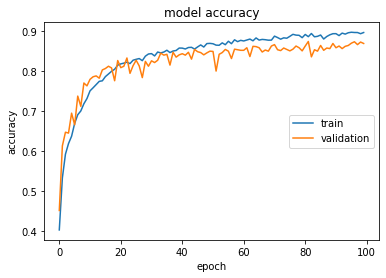

94/94 [==============================] - 4s 41ms/step - loss: 0.4082 - accuracy: 0.8650
Test score: 0.4081600308418274
Test accuracy: 0.8650000095367432


In [12]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])